# Recurrent Neural Networks

## Temperature-Forecasting using TensorFlow

[References]
- [TensorFlow Time Series Forecasting Tutorial](https://www.tensorflow.org/tutorials/structured_data/time_series)
- [Deep Learning with Python 2nd Edition, Chapter 10 Deep Learning for time series](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter10_dl-for-timeseries.ipynb)

## Download & Preprocess Data

In [1]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip

--2023-07-30 22:39:42--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
s3.amazonaws.com (s3.amazonaws.com) 해석 중... 54.231.128.40, 54.231.138.160, 52.216.57.72, ...
다음으로 연결 중: s3.amazonaws.com (s3.amazonaws.com)|54.231.128.40|:443... 연결했습니다.


HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 13565642 (13M) [application/zip]
저장 위치: `jena_climate_2009_2016.csv.zip'

jena_climate_2009_2 100%[===================>]  12.94M   424KB/s    /  38s     

2023-07-30 22:40:21 (349 KB/s) - `jena_climate_2009_2016.csv.zip' 저장함 [13565642/13565642]



In [2]:
!unzip jena_climate_2009_2016.csv.zip

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("jena_climate_2009_2016.csv")

df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420446,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420447,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420448,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420449,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [5]:
df.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [6]:
import os
fname = os.path.join("jena_climate_2009_2016.csv")

with open(fname) as f:
    data = f.read()

lines = data.split('\n')
header = lines[0].split(",")
lines = lines[1:]

In [7]:
print(len(lines))
lines[:20]

420451


['01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30',
 '01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10',
 '01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60',
 '01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.00',
 '01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.30',
 '01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.70',
 '01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.80,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.50',
 '01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.40,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.60',
 '01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.80,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.50',
 '01.01.2009 01:40:00,996.53,-8.43,264.99,-9.3

In [8]:
print('Number of header: ', len(header))

Number of header:  15


In [9]:
header

['"Date Time"',
 '"p (mbar)"',
 '"T (degC)"',
 '"Tpot (K)"',
 '"Tdew (degC)"',
 '"rh (%)"',
 '"VPmax (mbar)"',
 '"VPact (mbar)"',
 '"VPdef (mbar)"',
 '"sh (g/kg)"',
 '"H2OC (mmol/mol)"',
 '"rho (g/m**3)"',
 '"wv (m/s)"',
 '"max. wv (m/s)"',
 '"wd (deg)"']

In [10]:
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 2))

for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    temperature[i] = values[1]
    raw_data[i, 0] = values[0]
    raw_data[i, 1:]= values[2:]

In [11]:
print(temperature.shape)
print(raw_data.shape)

(420451,)
(420451, 13)


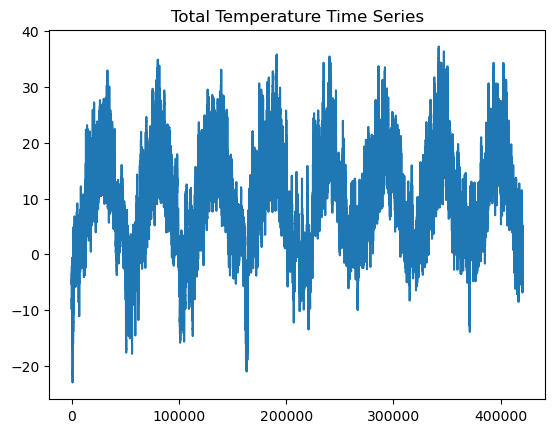

In [12]:
plt.plot(range(len(temperature)), temperature)
plt.title("Total Temperature Time Series")
plt.show()

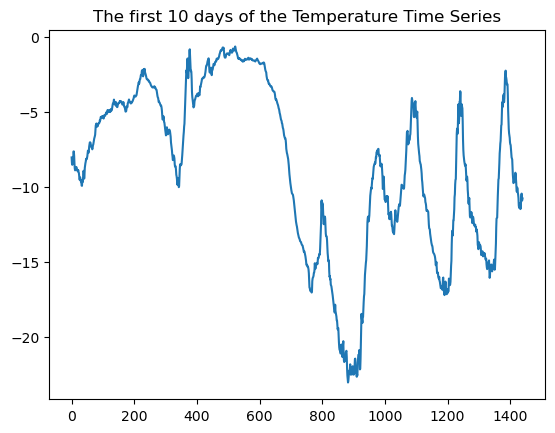

In [13]:
plt.plot(range(1440), temperature[:1440])
plt.title("The first 10 days of the Temperature Time Series")
plt.show()

In [14]:
num_train_samples = int(0.6 * len(raw_data))
num_val_samples = int(0.2 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples

print('num_train_samples:', num_train_samples)
print('num_val_samples:', num_val_samples)
print('num_test_samples:', num_test_samples)

num_train_samples: 252270
num_val_samples: 84090
num_test_samples: 84091


In [15]:
mean = raw_data[:num_train_samples].mean(axis=0)
std = raw_data[:num_train_samples].std(axis=0)

raw_data -= mean
raw_data /= std

In [16]:
X, y = raw_data, temperature

In [17]:
num_features = X.shape[1]
print('Number of features:', num_features)

Number of features: 13


## Data Generator

### Understanding `timeseries_dataset_from_array()`

We want to use a `data generator` that yields batches of data samples. Let's take a look at a simple example.

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, LSTM
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import Adam

In [19]:
# Tensorflow version = 2.4.1
int_sequence = np.arange(30)
dummy_dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
    data=int_sequence[:-6],
    targets=int_sequence[6:],
    sequence_length=3,
    sequence_stride=3,   # Default = 1
    sampling_rate=2,     # Default = 1
    batch_size=2,
    shuffle=False
)

# 텐서플로우 버전에 따라 함수 클래스가 다릅니다. (최신 버전의 경우 아래 함수 사용 가능)
# dummy_dataset = tf.keras.utils.timeseries_dataset_from_array(
#     data=int_sequence[:-6],
#     targets=int_sequence[6:],
#     sequence_length=3,
#     sequence_stride=3,
#     sampling_rate=2,
#     batch_size=2,
#     shuffle=False
# )

for inputs, targets in dummy_dataset:
    
    '''
    inputs shape : (batch_size, sequence_length)
    targets shape : (batch_size, )
    '''

    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))

[0, 2, 4] 6
[3, 5, 7] 9
[6, 8, 10] 12
[9, 11, 13] 15
[12, 14, 16] 18
[15, 17, 19] 21
[18, 20, 22] 24


2023-07-30 22:40:32.827612: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-07-30 22:40:32.828804: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-30 22:40:32.908828: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


### Instantiating datasets for training, validation, and testing

In [20]:
# Observations will be sampled at one data point per hour
sampling_rate = 6

# Observations will go back 5 days (120 hours)
sequence_length = 120

# The target for a sequence will be the temperature 24 hours after the end of the sequence.
delay = sampling_rate * (sequence_length - 1) + sampling_rate*24
batch_size = 256

train_dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
    data=X[:-delay],
    targets=y[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples
    )

val_dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
    data=X[:-delay],
    targets=y[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=False,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples
    )

test_dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
    data=X[:-delay],
    targets=y[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=False,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples,
    end_index=None
    )

In [21]:
for samples, targets in train_dataset:
    print('samples shape:', samples.shape)
    print('targets shape:', targets.shape)
    break

samples shape: (256, 120, 13)
targets shape: (256,)


## RNN models

### SimpleRNN

[Reference: 오승상 딥러닝](https://youtube.com/playlist?list=PLvbUC2Zh5oJvByu9KL82bswYT2IKf0K1M)
![SimpleRNN](SimpleRNN.png)

In [22]:
print('The number of features:', num_features)
print('The sequence length:', sequence_length)

The number of features: 13
The sequence length: 120


**Note: An RNN layer is capable of processing sequences of any length.**

- If we try to train a model with sequence data of arbitrary lengths, we set `sequence_length=None` in the `Input` layer.
- Clearly, sequence dataset of arbitrary lengths cannot be trained using minibatch. That is, we should set `batch_size=1`.


In [23]:
input_tensor = Input(shape=(sequence_length, num_features))
x = SimpleRNN(units=16, return_sequences=False)(input_tensor)
x = Dense(units=1, activation=None)(x)

model = Model(inputs=input_tensor, outputs=x)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), 
              loss='mse', metrics=['mse'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 13)]         0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 16)                480       
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


#### Let's check the number of parameters in RNN

- `num_features = 13` $\quad \to \quad$ dimension of $x_t$
- `hidden_state = 16` $\quad \to \quad$ dimension of $h_t$

**Computation of RNN core** : 
$h_t = \tanh(W_{xh}x_t + W_{hh} h_{t-1} + b_h) $

- $W_{xh}$ size : 13 $\times$ 16
- $W_{hh}$ size : 16 $\times$ 16
- $b_h$ size : 16
- Total : $13 \times 16 + 16 \times 16 + 16 = (13+16+1) \times 16 = 480$

In [24]:
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
983/983 [==============================] - 38s 37ms/step - loss: 39.9559 - mse: 39.9559 - val_loss: 10.4022 - val_mse: 10.4022
Epoch 2/10
983/983 [==============================] - 53s 53ms/step - loss: 10.5786 - mse: 10.5786 - val_loss: 10.0944 - val_mse: 10.0944
Epoch 3/10
983/983 [==============================] - 45s 45ms/step - loss: 10.2429 - mse: 10.2429 - val_loss: 9.9579 - val_mse: 9.9579
Epoch 4/10
983/983 [==============================] - 42s 43ms/step - loss: 10.0892 - mse: 10.0892 - val_loss: 9.8034 - val_mse: 9.8034
Epoch 5/10
983/983 [==============================] - 41s 42ms/step - loss: 9.9806 - mse: 9.9806 - val_loss: 9.8082 - val_mse: 9.8082
Epoch 6/10
983/983 [==============================] - 39s 39ms/step - loss: 9.9114 - mse: 9.9114 - val_loss: 9.8011 - val_mse: 9.8011
Epoch 7/10
983/983 [==============================] - 42s 43ms/step - loss: 9.8710 - mse: 9.8710 - val_loss: 9.7687 - val_mse: 9.7687
Epoch 8/10
983/983 [==============================

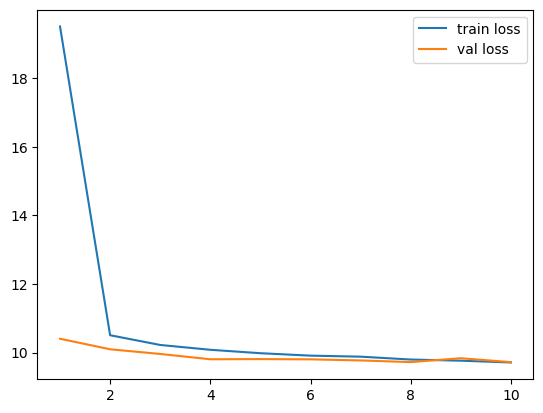

In [25]:
plt.plot(np.arange(1,10+1), history.history['loss'], label='train loss')
plt.plot(np.arange(1,10+1), history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [26]:
test_targets = np.empty([0])
print(test_targets)

for data in test_dataset:
    test_targets = np.append(test_targets, data[1])

test_num = test_targets.shape[0]
print(test_num)

[]
82514


In [27]:
predictions = model.predict(test_dataset)
predictions = predictions.reshape((test_num,))

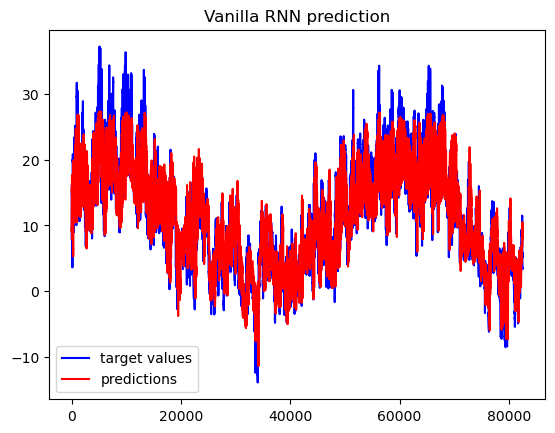

In [28]:
x = np.arange(test_num)
plt.plot(x, test_targets, label = 'target values', color='b')
plt.plot(x, predictions, label = 'predictions', color='r')
plt.title('Vanilla RNN prediction')
plt.legend()
plt.show()

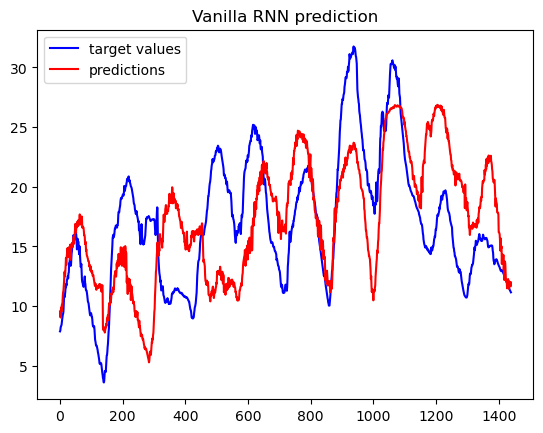

In [29]:
x = np.arange(1440)
plt.plot(x, test_targets[:1440], label = 'target values', color='b')
plt.plot(x, predictions[:1440], label = 'predictions', color='r')
plt.title('Vanilla RNN prediction')
plt.legend()
plt.show()

### Stacked RNN

In [30]:
input_tensor = Input(shape=(sequence_length, num_features))
x = SimpleRNN(units=16, return_sequences=True)(input_tensor)
x = SimpleRNN(units=16, return_sequences=False)(x)
x = Dense(units=1, activation=None)(x)

model2 = Model(inputs=input_tensor, outputs=x)
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss='mse', metrics=['mse'])

model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 120, 13)]         0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 120, 16)           480       
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [31]:
history2 = model2.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
983/983 [==============================] - 53s 53ms/step - loss: 72.1712 - mse: 72.1712 - val_loss: 14.2023 - val_mse: 14.2023
Epoch 2/10
983/983 [==============================] - 50s 51ms/step - loss: 14.4349 - mse: 14.4349 - val_loss: 10.9461 - val_mse: 10.9461
Epoch 3/10
983/983 [==============================] - 56s 56ms/step - loss: 11.2879 - mse: 11.2879 - val_loss: 10.2196 - val_mse: 10.2196
Epoch 4/10
983/983 [==============================] - 59s 59ms/step - loss: 10.0970 - mse: 10.0970 - val_loss: 10.0955 - val_mse: 10.0955
Epoch 5/10
983/983 [==============================] - 53s 54ms/step - loss: 9.8183 - mse: 9.8183 - val_loss: 9.8490 - val_mse: 9.8490
Epoch 6/10
983/983 [==============================] - 56s 57ms/step - loss: 9.6772 - mse: 9.6772 - val_loss: 9.8975 - val_mse: 9.8975
Epoch 7/10
983/983 [==============================] - 61s 62ms/step - loss: 9.5539 - mse: 9.5539 - val_loss: 9.6931 - val_mse: 9.6931
Epoch 8/10
983/983 [==========================

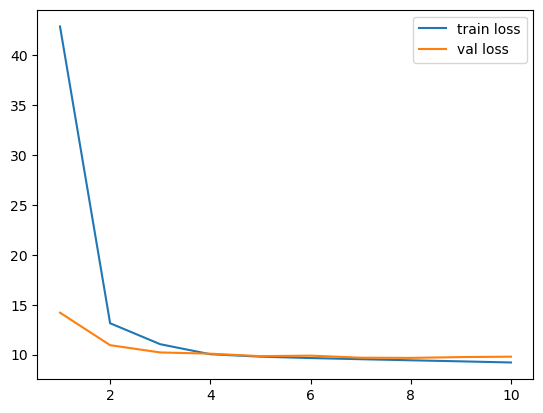

In [32]:
plt.plot(np.arange(1,10+1), history2.history['loss'], label='train loss')
plt.plot(np.arange(1,10+1), history2.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [33]:
predictions2 = model2.predict(test_dataset)
predictions2 = predictions2.reshape((test_num,))

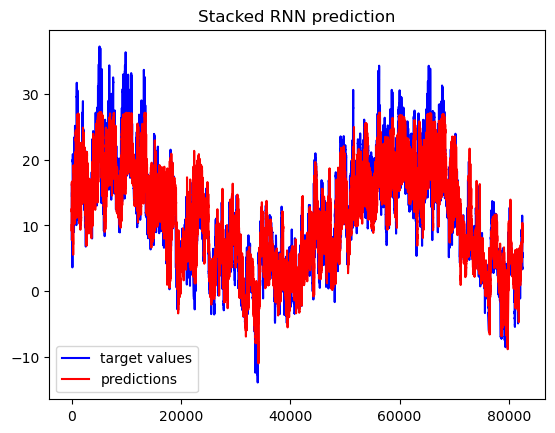

In [34]:
x = np.arange(test_num)
plt.plot(x, test_targets, label = 'target values', color='b')
plt.plot(x, predictions2, label = 'predictions', color='r')
plt.title('Stacked RNN prediction')
plt.legend()
plt.show()

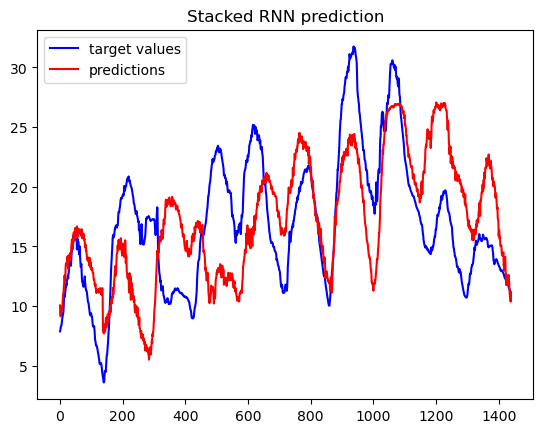

In [35]:
x = np.arange(1440)
plt.plot(x, test_targets[:1440], label = 'target values', color='b')
plt.plot(x, predictions2[:1440], label = 'predictions', color='r')
plt.title('Stacked RNN prediction')
plt.legend()
plt.show()

### LSTM 

[Reference: 오승상 딥러닝](https://youtube.com/playlist?list=PLvbUC2Zh5oJvByu9KL82bswYT2IKf0K1M)
![LSTM](LSTM.png)

In [36]:
input_tensor = Input(shape=(sequence_length, num_features))
x = LSTM(units=16, return_sequences=False)(input_tensor)
x = Dense(units=1, activation=None)(x)

model3 = Model(inputs=input_tensor, outputs=x)
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss='mse', metrics=['mse'])

model3.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 120, 13)]         0         
_________________________________________________________________
lstm (LSTM)                  (None, 16)                1920      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 1,937
Trainable params: 1,937
Non-trainable params: 0
_________________________________________________________________


#### Let's check the number of parameters in LSTM

- `num_features = 13` $\quad \to \quad$ dimension of $x_t$
- `hidden_state = 16` $\quad \to \quad$ dimension of $h_t$
- `cell_state = 16` $\quad \to \quad$ dimension of $c_t$

**Computation in an LSTM cell**

- $i_t = \sigma(W_{xh}^i x_t + W_{hh}^i h_{t-1} + b_h^i)$ : input gate
- $f_t = \sigma(W_{xh}^f x_t + W_{hh}^f h_{t-1} + b_h^f)$ : forget gate
- $o_t = \sigma(W_{xh}^o x_t + W_{hh}^o h_{t-1} + b_h^o)$ : output gate
- $g_t = \tanh(W_{xh}^g x_t + W_{hh}^g h_{t-1} + b_h^g)$ : RNN core

*Total number of parameters*
- each of $W_{xh}$ size : 13 $\times$ 16
- each of $W_{hh}$ size : 16 $\times$ 16
- each of $b_h$ size : 16
- Total : $4\times (13 \times 16 + 16 \times 16 + 16) = 4 \times (13+16+1) \times 16 = 1920$

In [37]:
history3 = model3.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
983/983 [==============================] - 67s 66ms/step - loss: 68.7722 - mse: 68.7722 - val_loss: 12.9322 - val_mse: 12.9322
Epoch 2/10
983/983 [==============================] - 74s 75ms/step - loss: 13.7684 - mse: 13.7684 - val_loss: 10.5405 - val_mse: 10.5405
Epoch 3/10
983/983 [==============================] - 61s 62ms/step - loss: 10.4449 - mse: 10.4449 - val_loss: 10.1478 - val_mse: 10.1478
Epoch 4/10
983/983 [==============================] - 63s 64ms/step - loss: 9.7274 - mse: 9.7274 - val_loss: 10.0394 - val_mse: 10.0394
Epoch 5/10
983/983 [==============================] - 59s 60ms/step - loss: 9.3825 - mse: 9.3825 - val_loss: 9.9769 - val_mse: 9.9769
Epoch 6/10
983/983 [==============================] - 69s 70ms/step - loss: 9.1418 - mse: 9.1418 - val_loss: 9.8222 - val_mse: 9.8222
Epoch 7/10
983/983 [==============================] - 65s 66ms/step - loss: 8.8810 - mse: 8.8810 - val_loss: 9.7093 - val_mse: 9.7093
Epoch 8/10
983/983 [============================

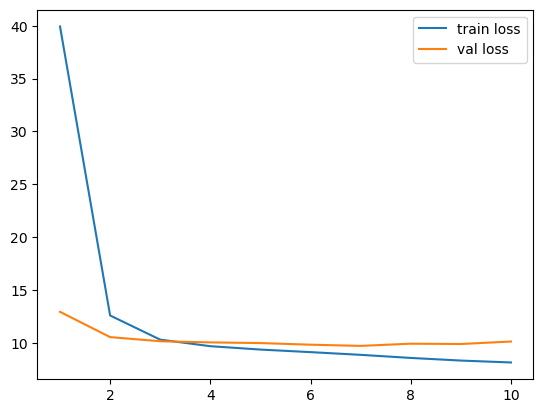

In [38]:
plt.plot(np.arange(1,10+1), history3.history['loss'], label='train loss')
plt.plot(np.arange(1,10+1), history3.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [39]:
predictions3 = model3.predict(test_dataset)
predictions3 = predictions3.reshape((test_num,))

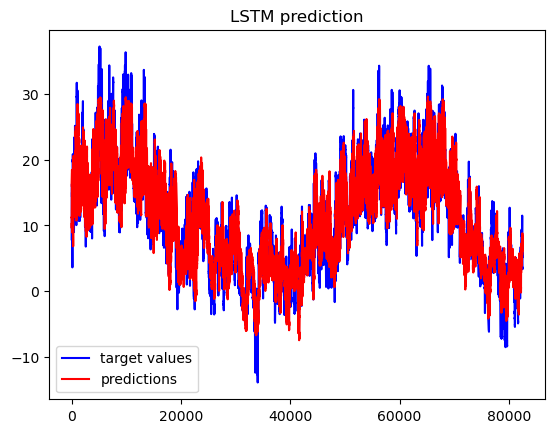

In [40]:
x = np.arange(test_num)
plt.plot(x, test_targets, label = 'target values', color='b')
plt.plot(x, predictions3, label = 'predictions', color='r')
plt.title('LSTM prediction')
plt.legend()
plt.show()

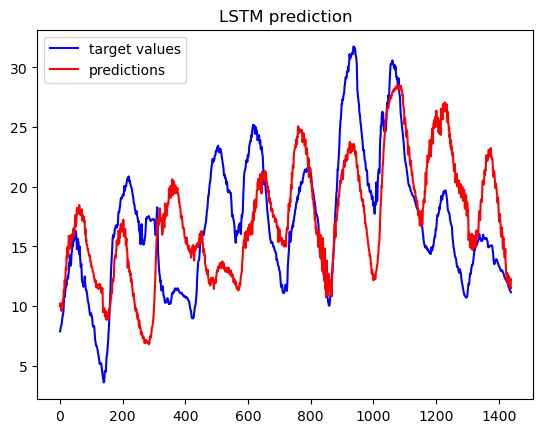

In [41]:
x = np.arange(1440)
plt.plot(x, test_targets[:1440], label = 'target values', color='b')
plt.plot(x, predictions3[:1440], label = 'predictions', color='r')
plt.title('LSTM prediction')
plt.legend()
plt.show()